### Análise dos dados do IBGE sobre o Efetivos de Rebanhos

- Importando as bibliotecas necessárias para o projeto

In [64]:
# Importando biliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point


In [65]:
# Removendo os avisos
import warnings
warnings.filterwarnings("ignore")

- Leitura dos dados

In [66]:
# Lendo os dados
base = pd.read_csv("efetivo_rebanhos.csv", sep=',', encoding='UTF-8')
# Verificando as 5 primeiras linhas
base.head()

,ano,sigla_uf,id_municipio,tipo_rebanho,quantidade
0,1978,RO,1100106,Bovino,12943
1,1978,RO,1100304,Bovino,6392
2,1978,AC,1200054,Bovino,1000
3,1978,AC,1200336,Bovino,1153
4,1978,AC,1200401,Bovino,64000


- Análisando os dados

In [67]:
# Verificando as 5 últimas linhas
base.tail()

,ano,sigla_uf,id_municipio,tipo_rebanho,quantidade
1368139,1995,GO,5221577,Galináceos - galinhas,12000
1368140,1995,GO,5221601,Galináceos - galinhas,25000
1368141,1995,GO,5221700,Galináceos - galinhas,18000
1368142,1995,GO,5221809,Galináceos - galinhas,11000
1368143,1995,GO,5222005,Galináceos - galinhas,16800


In [68]:
# Verificando a dimensão da base de dados
base.shape

(1368144, 5)

In [69]:
# Verificando as informações dos dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368144 entries, 0 to 1368143
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   ano           1368144 non-null  int64 
 1   sigla_uf      1368144 non-null  object
 2   id_municipio  1368144 non-null  int64 
 3   tipo_rebanho  1368144 non-null  object
 4   quantidade    1368144 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 52.2+ MB


In [70]:
# Renomeando as colunas necessárias
base = base.rename(columns={'sigla_uf': 'uf',
                     'quantidade': 'qtd_animais',
                     })

- Filtrando os dados do ano de 2019

In [71]:
# Separando os dados pelo ano de 2019 - "setando" os dados
ano_2019 = base.loc[base['ano'] == 2019]
ano_2019.head()

,ano,uf,id_municipio,tipo_rebanho,qtd_animais
6772,2019,RO,1100015,Bovino,428976
6773,2019,RO,1100023,Bovino,477665
6774,2019,RO,1100072,Bovino,324898
6775,2019,RO,1100106,Bovino,128580
6776,2019,RO,1100114,Bovino,517149


- Realizando à análise dos dados de 2019

In [72]:
# Verificando as informações da nova base de dados
ano_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36342 entries, 6772 to 930524
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ano           36342 non-null  int64 
 1   uf            36342 non-null  object
 2   id_municipio  36342 non-null  int64 
 3   tipo_rebanho  36342 non-null  object
 4   qtd_animais   36342 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.7+ MB


In [73]:
# Conferindo as categorias e se existem inconsistências na coluna "tipo_rebanho"
ano_2019['tipo_rebanho'] = pd.Categorical(ano_2019['tipo_rebanho'])
print(ano_2019['tipo_rebanho'].cat.categories)

Index(['Bovino', 'Bubalino', 'Caprino', 'Codornas', 'Equino',
       'Galináceos - galinhas', 'Suíno - matrizes de suínos', 'Suíno - total'],
      dtype='object')


In [74]:
# Conferindo as categorias e se existem inconsistências na coluna "sigla_uf"
ano_2019['uf'] = pd.Categorical(ano_2019['uf'])
print(ano_2019['uf'].cat.categories)

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object')


In [75]:
# Renomeando e unificando categorias
    # Defindo apenas a categoria Galináceos e categoria Suíno
ano_2019['tipo_rebanho'] = ano_2019['tipo_rebanho'].replace({
    'Galináceos - galinhas': "Galináceos", 
    'Suíno - matrizes de suínos': 'Suíno',
    'Suíno - total': 'Suíno',
}
)

In [76]:
# Verificando a completude dos dados da base
completude = 100 - (ano_2019.isna(). sum() / len(ano_2019) * 100)
df_completude = pd.DataFrame({"Completude": completude})
print(df_completude)

              Completude
ano                100.0
uf                 100.0
id_municipio       100.0
tipo_rebanho       100.0
qtd_animais        100.0


In [77]:
# Verificando se existem espaços desnecessários na coluna tipo_rebanho
print("Espaços desnecessários na coluna tipo_rebanho: ",
      ano_2019['tipo_rebanho'].str.contains(r'\s{2,}', regex=True).sum())

Espaços desnecessários na coluna tipo_rebanho:  0


- Análise Exploratória e Visualização Gráfica dos dados de 2019

In [78]:
# Analisando as estatísticas da base de dados
    # Percebe-se que existe variação considerável 
    # entre  os valores mínimo e máximo na coluna quantidade
ano_2019_2 = ano_2019[['ano', 'id_municipio','qtd_animais']].astype(int) # Reforçando as colunas como inteiro
describe_df = ano_2019_2.describe()
describe_df.style.format('{:.0f}') # Definindo o reforço do formato para inteiro

,ano,id_municipio,qtd_animais
count,36342,36342,36342
mean,2019,3274340,14967
std,0,1002549,135016
min,2019,1100015,1
25%,2019,2513505,180
50%,2019,3149200,944
75%,2019,4125803,5500
max,2019,5300108,16416029


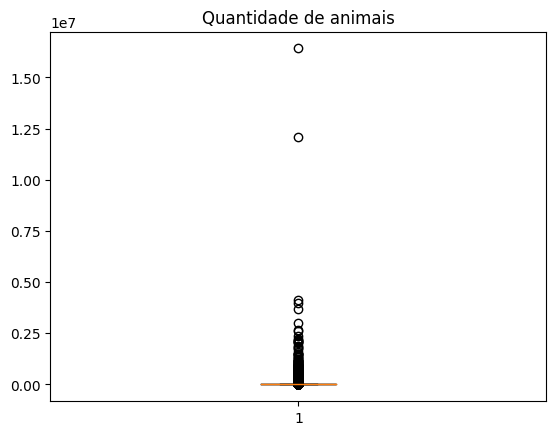

In [79]:
# Verificando o boxplot para análise de quantidade de animais
plt.boxplot(ano_2019['qtd_animais'])
plt.title('Quantidade de animais')
plt.show()

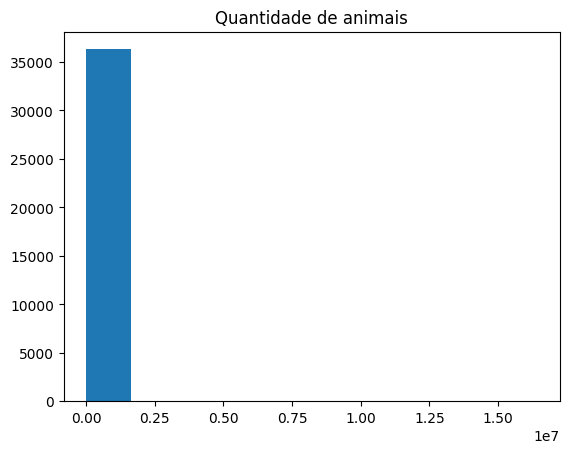

In [80]:
# Verificando o histograma
plt.hist(ano_2019['qtd_animais'])
plt.title('Quantidade de animais')
plt.show()

Idem ao boxplot onde a maior 
parte das observações são de 
pequeno valor, porém existindo 
observações pontuais de elevado 
valor, mas de baixa frequência

In [81]:
# avaliação das observações de maior valor, suas características e combinações.
    # elencando as observações com os 20 maiores valores de “quantidade”
top_20animais = ano_2019.nlargest(20, 'qtd_animais').reset_index(drop=True)
top_20animais.index +=1
top_20animais

,ano,uf,id_municipio,tipo_rebanho,qtd_animais
1,2019,ES,3204559,Galináceos,16416029
2,2019,SP,3505807,Galináceos,12107000
3,2019,MT,5107040,Galináceos,4150511
4,2019,PE,2613008,Galináceos,4000325
5,2019,ES,3204559,Codornas,3680464
6,2019,MG,3133105,Galináceos,3007000
7,2019,SP,3518206,Galináceos,2652251
8,2019,GO,5210000,Galináceos,2596000
9,2019,GO,5212303,Galináceos,2365000
10,2019,PA,1507300,Bovino,2241537


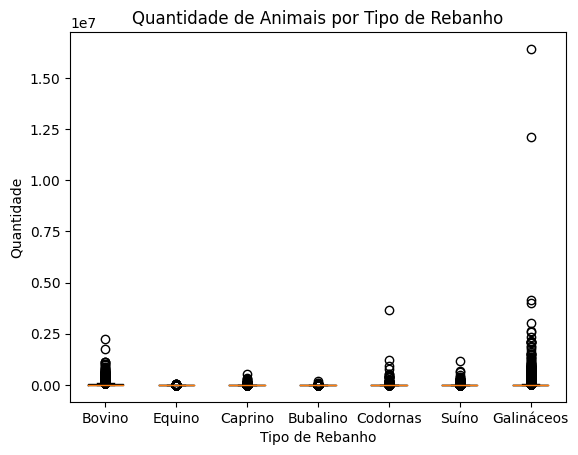

In [82]:
# Verificando o boxplot de tipo de rebanho por quantidade
x = ano_2019['tipo_rebanho']
y = ano_2019['qtd_animais']
plt.boxplot([y[x == tipo] for tipo in x.unique()], labels=x.unique())
plt.title('Quantidade de Animais por Tipo de Rebanho')
plt.xlabel('Tipo de Rebanho')
plt.ylabel('Quantidade')
plt.show()


- os maiores valores apontam para a categoria galináceos para “tipo_rebanho”.
- Indicando que pode existir uma diferença entre os padrões de distribuição 
dos dados entre diferentes categorias.


In [83]:
# Agrupando a média de tipo de rebanho por quantidade de animais 
ano_2019.groupby('tipo_rebanho')['qtd_animais'].mean()

tipo_rebanho
Bovino        38773.701282
Bubalino        515.823381
Caprino        2269.812561
Codornas      16798.281581
Equino         1059.778703
Galináceos    45356.594540
Suíno          4165.799559
Name: qtd_animais, dtype: float64

As médias obtidas reforçam o resultado de que o tipo de rebanho é uma fonte de variação que influencia fortemente a distribuição de valores da variável. Considerando a origem dos dados confiável, por terem sido gerados pelo Instituto Brasileiro de Geografia e Estatística (IBGE), e portanto reais, não há possibilidade de correção nesse sentido.

- Enriquecendo a base de dados de 2019 e carregando a base de municípios brasileiros

In [84]:
# Carregando a base de dados
municipios_brasil = pd.read_csv('municipios_brasileiros.csv', sep=',', encoding='UTF-8')
# Lendo as 5 primeiras linhas
municipios_brasil.head()

,codigo_ibge,nome_municipio,codigo_uf,uf,estado,capital,latitude,longitude
0,5200050,Abadia de Goiás,52,GO,Goiás,0,-16.75730,-49.4412
1,3100104,Abadia dos Dourados,31,MG,Minas Gerais,0,-18.48310,-47.3916
2,5200100,Abadiânia,52,GO,Goiás,0,-16.19700,-48.7057
3,3100203,Abaeté,31,MG,Minas Gerais,0,-19.15510,-45.4444
4,1500107,Abaetetuba,15,PA,Pará,0,-1.72183,-48.8788


In [85]:
# Carregando as 5 últimas linhas
municipios_brasil.tail()

,codigo_ibge,nome_municipio,codigo_uf,uf,estado,capital,latitude,longitude
5565,2933604,Xique-Xique,29,BA,Bahia,0,-10.82300,-42.7245
5566,2517407,Zabelê,25,PB,Paraíba,0,-8.07901,-37.1057
5567,3557154,Zacarias,35,SP,São Paulo,0,-21.05060,-50.0552
5568,2114007,Zé Doca,21,MA,Maranhão,0,-3.27014,-45.6553
5569,4219853,Zortéa,42,SC,Santa Catarina,0,-27.45210,-51.5520


In [86]:
# Excluindo a coluna que "uf" que já consta na planilha "ano_2019"
municipios_brasil = municipios_brasil.drop('uf', axis=1)

In [87]:
# Renomeando a coluna "código_ibge" para "id_municipio"
municipios_brasil = municipios_brasil.rename(columns={
    'codigo_ibge': 'id_municipio'
    }
)

In [88]:
# Realizando o cruzamento das planilhas "ano_2019" com "municipios_brasil"
base_cruzada = pd.merge(ano_2019,municipios_brasil, on='id_municipio', how='left')
# Printando a planilha mesclada
base_cruzada.head()

,ano,uf,id_municipio,tipo_rebanho,qtd_animais,nome_municipio,codigo_uf,estado,capital,latitude,longitude
0,2019,RO,1100015,Bovino,428976,Alta Floresta D'Oeste,11,Rondônia,0,-11.92830,-61.9953
1,2019,RO,1100023,Bovino,477665,Ariquemes,11,Rondônia,0,-9.90571,-63.0325
2,2019,RO,1100072,Bovino,324898,Corumbiara,11,Rondônia,0,-12.95510,-60.8947
3,2019,RO,1100106,Bovino,128580,Guajará-Mirim,11,Rondônia,0,-10.78890,-65.3296
4,2019,RO,1100114,Bovino,517149,Jaru,11,Rondônia,0,-10.43180,-62.4788


In [90]:
# Conferindo as categorias e se existem inconsistências na coluna "sigla_uf"
base_cruzada['uf'] = pd.Categorical(base_cruzada['uf'])
print(base_cruzada['uf'].cat.categories)

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object')


In [91]:
# Verificando a completude dos dados da base
completude2 = 100 - (base_cruzada.isna(). sum() / len(base_cruzada) * 100)
df_completude2 = pd.DataFrame({"Completude": completude2})
print(df_completude2)

                Completude
ano                  100.0
uf                   100.0
id_municipio         100.0
tipo_rebanho         100.0
qtd_animais          100.0
nome_municipio       100.0
codigo_uf            100.0
estado               100.0
capital              100.0
latitude             100.0
longitude            100.0


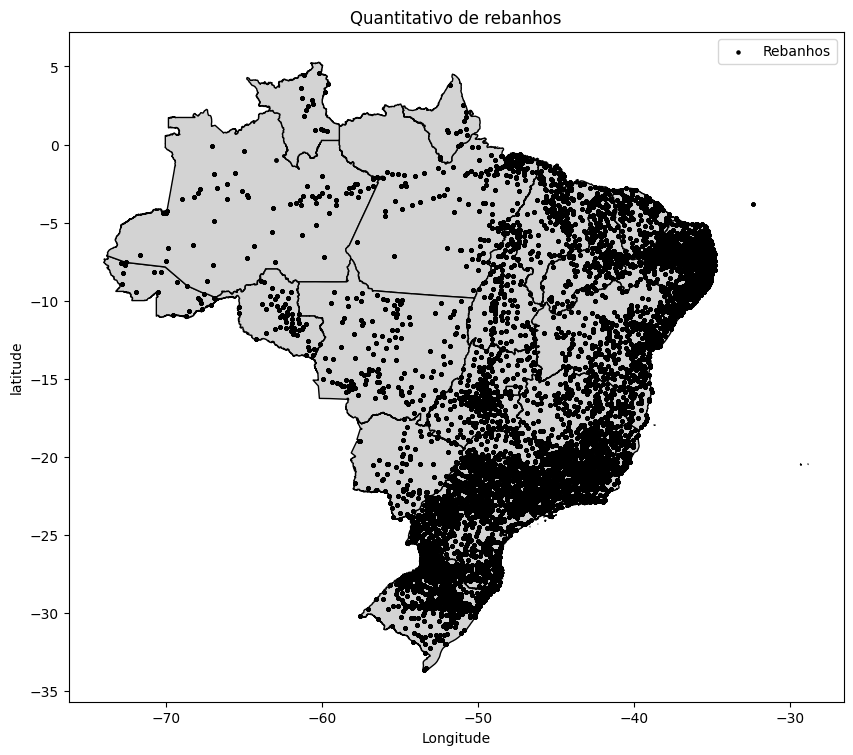

In [92]:
estados = gpd.read_file('BR_UF_2022.shp')

geo_base = gpd.GeoDataFrame(base_cruzada,
                            geometry=gpd.points_from_xy(base_cruzada['longitude'],
                                                        base_cruzada['latitude']))

fig, ax = plt.subplots(figsize=(10, 10))
estados.plot(ax=ax, color='lightgrey', edgecolor='black')  # Plotar o mapa do Brasil
geo_base.plot(ax=ax, color='black', markersize=5, label='Rebanhos')  # Plotar os pontos

plt.title('Quantitativo de rebanhos')
plt.xlabel('Longitude')
plt.ylabel('latitude')
plt.legend()
plt.show()



In [94]:
mapa = px.density_mapbox(base_cruzada,
                         lon='longitude',
                         lat='latitude',
                         z='qtd_animais',
                         mapbox_style='open-street-map',
                         zoom=3)
mapa.update_layout(margin=({'r': 0,
                            't': 0,
                            'b': 0,
                            'l': 0,
                            }))
mapa.show()